# Homework
Writer: Junhyuck Woo

## Library

In [1]:
import csv; import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from textblob import TextBlob as tb

## Function

In [2]:
def feature_addition(row):
    t_zone = row[1]
    if t_zone in asia:
        row.append("Asia")
    elif t_zone in america:
        row.append("America")
    elif t_zone in europe:
        row.append("Europe")
    elif t_zone in africa:
        row.append("Africa")
    elif t_zone in oceania:
        row.append("Oceania")
    else:
        row.append("None")
    return(row)

In [3]:
def normalize(data):
    d_min = data.min()
    d_max = data.max()
    n = (data - d_min) / (d_max - d_min)
    return(n)

## General variable

In [4]:
raw = []; data = []; num_line = 0
continent_list = {'Asia':0, 'America':0, 'Europe':0, 'Africa':0, 'Oceania':0, 'None':0}
p_sentiment = {"America/Chicago":0, "America/Denver":0,"America/Detroit":0, 
               "America/Halifax":0, "America/Los_Angeles":0, "America/New_York":0, 
               "America/Phoenix":0, "Alaska":0, "Arizona":0, "Hawaii":0, "Indiana (East)":0, 
               "Midway Island":0, "Monterrey":0, "Hobart":0}
n_sentiment = {"America/Chicago":0, "America/Denver":0,"America/Detroit":0, 
               "America/Halifax":0, "America/Los_Angeles":0, "America/New_York":0, 
               "America/Phoenix":0, "Alaska":0, "Arizona":0, "Hawaii":0, "Indiana (East)":0,
               "Midway Island":0, "Monterrey":0, "Hobart":0}

usa =["America/Chicago", "America/Denver","America/Detroit", "America/Halifax", 
      "America/Los_Angeles", "America/New_York", "America/Phoenix", "Alaska", 
      "Arizona", "Hawaii", "Hobart", "Indiana (East)", "Midway Island", "Monterrey"]
asia = ["Asia/Bangkok", "Asia/Calcutta", "Asia/Kuala_Lumpur", "Asia/Manila", 
        "Asia/Tokyo", "Tokyo", "Hanoi", "Osaka", "Baghdad",  "Bangkok", "Beijing", 
        "Dhaka", "Hong Kong", "Seoul", "Singapore", "New Delhi", "Yerevan", "Urumqi", 
        "Tehran", "Taipei",  "Sri Jayawardenepura", "Riyadh", "Chennai", "Islamabad", 
        "Jakarta", "Jerusalem", "Kabul", "Karachi", "Kuala Lumpur", "Kuwait", "Mumbai", 
        "Muscat", "Abu Dhabi", "Almaty", "Baghdad", "Baku"]
america = ["Alaska", "America/Bahia_Banderas", "America/Chicago", "America/Denver","America/Detroit", "America/Edmonton", "America/Glace_Bay", "America/Halifax", 
           "America/Los_Angeles", "America/Manaus", "America/Mexico_City", "America/New_York", "America/Phoenix", "America/Sao_Paulo", "America/Toronto", 
           "America/Vancouver", "Arizona", "Atlantic Time (Canada)", "Central America", "Central Time (US & Canada)", "Eastern Time (US & Canada)", "EST", 
           "CST", "Mountain Time (US & Canada)", "Pacific Time (US & Canada)", "Hawaii", "Indiana (East)", "Lima", "Mazatlan", "Newfoundland", 
           "Mexico City", "Midway Island", "Monterrey", "Tijuana", "EDT", "PST", "PDT", "Bogota", "Saskatchewan", "Santiago", "Quito", "Chihuahua", "Hobart", "Mid-Atlantic", "Monterrey", "Brasilia", "Buenos Aires" , "Caracas"]
europe = ["Amsterdam", "Athens", "Berlin", "Europe/Lisbon", "Europe/London", "Europe/Paris", "London", "Paris", "Azores",
          "Edinburgh", "Moscow", "Rome", "Stockholm", "Ekaterinburg", "Greenland",  "Kyiv", "La Paz",  "Lisbon", "Ljubljana", 
          "Madrid", "Novosibirsk", "Volgograd", "Warsaw", "Sarajevo", "Zagreb", "Yakutsk", "Wellington", "Tallinn", "Dublin", "Guadalajara", "Helsinki",
          "Perth", "Copenhagen", "Irkutsk", "Belgrade", "Istanbul", "Krasnoyarsk", "New Caledonia", "Bern", "Bratislava", "Brussels", "Bucharest", "Budapest"]
africa = ["Africa/Dar_es_Salaam", "Africa/Johannesburg", "Pretoria", "West Central Africa", "Harare", "Casablanca", "Nairobi", "Cairo"]
oceania = ["Pacific/Auckland", "Sydney", "Nuku'alofa", "Vienna", "Brisbane", "Melbourne", "Canberra"]

## Data collection
This process is done by the professor, I just use cleaned data

## Data Load & Data Processing
I found that there are missing values. In addition, I thought that I could add new features.<br>
3 values were missing, Time Zone, Timestamp, and Y-M-D-H(PST). <br>
Before inserting the data, I checked the other value. <br>
After that, I set a Timestamp as same as the other, made Y-M-D-H value using other data (Year, Month, Day, and Hour)<br>
I could not guarantee the time zone value, so I assigned "None".
1. Pass the header
2. Remove noise
3. Add new feature
4. Save data

In [5]:
with open('GoodDoctorWeek1_clean.csv', encoding="UTF-8") as csv_file:
#with open('GoodDoctorWeek1_clean.csv') as csv_file:
    # using csv_reader
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        # pass the header
        if num_line == int(0):
            num_line += 1
            row.append("Continent")
            raw.append(row)
            continue
        
        # check the noise & Fix it
        if row[1] == '2017':
            row.pop(); row.pop(); row.pop()
            row.insert(1,"1510000000000")
            row.insert(1, "None")
            row.insert(3, row[3] + '-' + row[4] + '-' + row[5] + '-'  + row[6])
        
        # Add new feature - continent information
        row = feature_addition(row)
        
        raw.append(row)
        num_line += 1

In [6]:
f = open('GoodDoctor_processed.csv', 'a', encoding="UTF-8")
out = csv.writer(f, delimiter=',',quoting=csv.QUOTE_ALL)
for i in range(num_line):
    out.writerow(raw[i])
f.close()

## Load processed data

In [7]:
num_line = 0
with open('GoodDoctor_processed.csv', encoding="UTF-8") as csv_file:
    # using csv_reader
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        # pass the header
        if num_line == int(0):
            num_line += 1
            continue
        data.append(row)
        num_line += 1

## Data Analysis
Based on the clean data, I tried to analysis 3 things.<br>
1. Which continents show more attention?<br>
2. How was the data trend?<br>
3. Which of state more like this drama?

### 1. Continent based comparison
First I hope to check the interest from each continent.<br>
In my case, I divided it into 6 one, but there is no information about the Antarctic.<br>
Finally, I counted the number of frequency of the tweet.

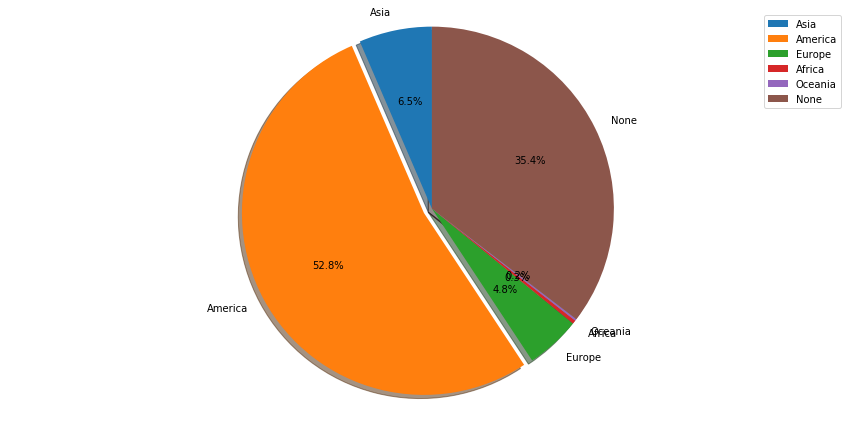

In [8]:
for i in range(num_line-1):
    continent_list[data[i][8]] += 1
# Pie chart
plt.figure(figsize=(12, 6))
sizes = []
labels = ['Asia', 'America', 'Europe', 'Africa', 'Oceania', 'None']
for i in range(6):
    sizes.append(continent_list[labels[i]])
explode = (0, 0.05, 0, 0, 0, 0)
patches, _, _  = plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### 2. Time based frequency trend
At first, choose 2 continents, America and Asia.<br>
Each of continent show high-interest about K-drama.<br>
I hope to analysis trend during the data collection duration.<br>
So I made a 3d chart, x: date, y: time, z: frequency.

In [9]:
asia_trend = np.zeros((6,24))
america_trend = np.zeros((6,24))

x = [23, 24, 25, 26, 27, 28]
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
X, Y = np.meshgrid(x, y)

for i in range(num_line-1):
    if 'America' in data[i][8]:
        america_trend[int(data[i][6])-23][int(data[i][7])] += 1
        
    if 'Asia' in data[i][8]:
        asia_trend[int(data[i][6])-23][int(data[i][7])] += 1
        
n_asia_trend = normalize(asia_trend)
n_america_trend = normalize(america_trend)

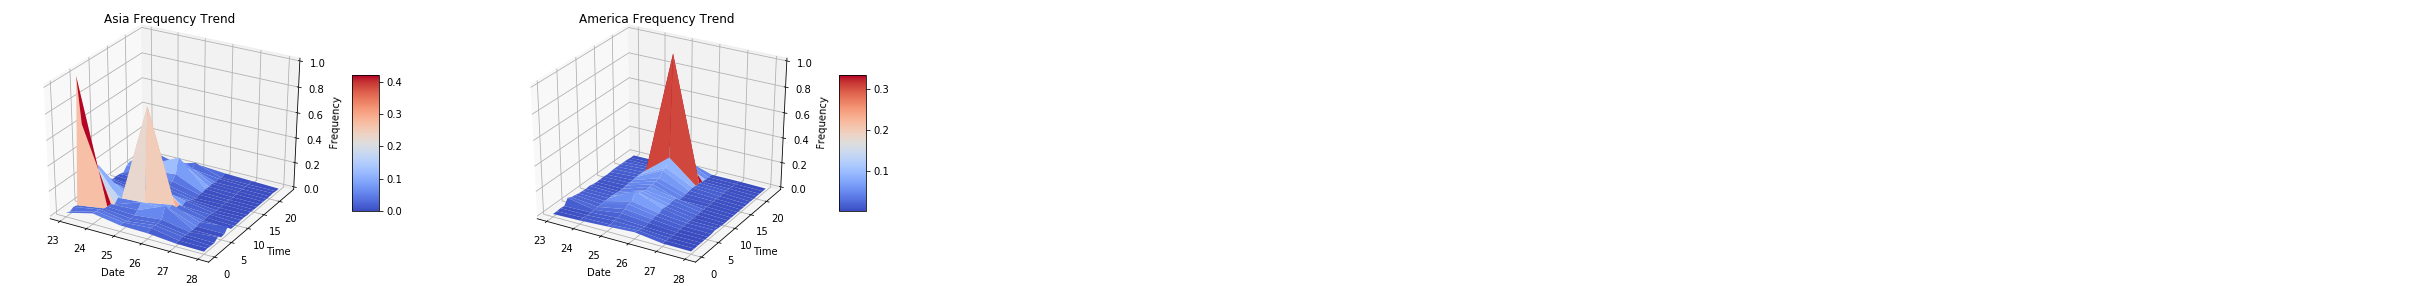

In [10]:
fig = plt.figure(figsize=(16, 5))
ax0 = fig.add_subplot(1, 2, 1, projection='3d', title='Asia Frequency Trend')
ax0.set_xlabel('Date'); ax0.set_ylabel('Time'); ax0.set_zlabel('Frequency')
surf0 = ax0.plot_surface(X, Y, n_asia_trend.T, cmap=cm.coolwarm)
fig.colorbar(surf0, shrink=0.5, aspect=5)

ax1 = fig.add_subplot(1, 2, 2, projection='3d', title='America Frequency Trend')
ax1.set_xlabel('Date'); ax1.set_ylabel('Time'); ax1.set_zlabel('Frequency')
surf1 = ax1.plot_surface(X, Y, n_america_trend.T, cmap=cm.coolwarm)
fig.colorbar(surf1, shrink=0.5, aspect=5)
plt.show()

### 3. Compare sentiment between states cities
As you know, 53% of tweet data was collected from the United States of America.<br>
I hope to check which states or cities more like this drama. <br>
Because it can be a good data to start new buisness.

In [11]:
num_line = 0
with open('GoodDoctor_processed.csv', encoding="UTF-8") as csv_file:
    # using csv_reader
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        # pass the header
        if num_line == int(0):
            num_line += 1
            continue
            
        if row[1] in usa:
            txt = row[0]
            sentiment = tb(txt).polarity
            if sentiment < 0:
                n_sentiment[row[1] ] += sentiment
            else:
                p_sentiment[row[1] ] += sentiment
p_sentiment = np.array(sorted(p_sentiment.items(), key=lambda t: t[1], reverse=True)).T
n_sentiment = np.array(sorted(n_sentiment.items(), key=lambda t: t[1])).T

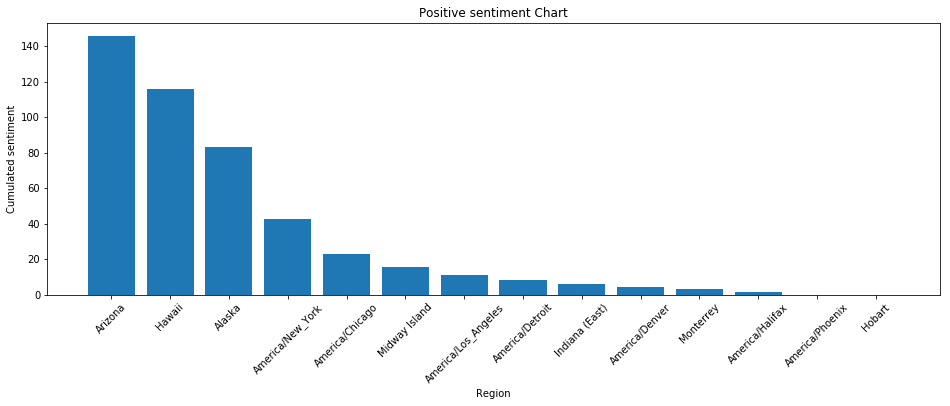

In [12]:
x = p_sentiment[0]
y = p_sentiment[1].astype(np.float)

plt.figure(figsize=(16, 5))
plt.bar(x, y, align='center')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Cumulated sentiment')
plt.title('Positive sentiment Chart')
plt.show()

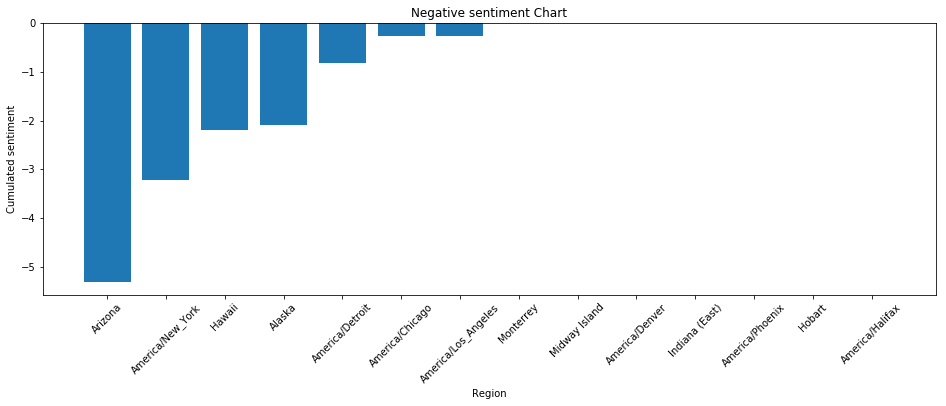

In [13]:
x = n_sentiment[0]
y = n_sentiment[1].astype(np.float)

plt.figure(figsize=(16, 5))
plt.bar(x, y, align='center')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Cumulated sentiment')
plt.title('Negative sentiment Chart')
plt.show()